Copied from https://datascience.stackexchange.com/questions/8457/python-library-for-segmented-regression-a-k-a-piecewise-regression

Citation:
Muggeo, V. M. (2003). Estimating regression models with unknown breakpoints. 
Statistics in medicine, 22(19), 3055-3071.

Based on the R package R_segmented by Vito M. R. Muggeo: 
https://cran.r-project.org/web/packages/segmented/segmented.pdf

In [42]:
### IMPORT PACKAGES ###

%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from numpy.linalg import lstsq
from scipy import stats

In [60]:
### DEFINE SEGMENTED LINEAR REGRESSION FUNCTION ###

ramp = lambda u: np.maximum( u, 0 )
step = lambda u: ( u > 0 ).astype(float)

def SegmentedLinearReg( X, Y, breakpoints ):
    nIterationMax = 1000

    breakpoints = np.sort( np.array(breakpoints) )

    dt = np.min( np.diff(X) )
    ones = np.ones_like(X)

    for i in range( nIterationMax ):
        # Linear regression:  solve A*p = Y
        Rk = [ramp( X - xk ) for xk in breakpoints ]
        Sk = [step( X - xk ) for xk in breakpoints ]
        A = np.array([ ones, X ] + Rk + Sk )
        p =  lstsq(A.transpose(), Y, rcond=None)[0] 

        # Parameters identification:
        a, b = p[0:2]
        ck = p[ 2:2+len(breakpoints) ]
        dk = p[ 2+len(breakpoints): ]

        # Estimation of the next break-points:
        newBreakpoints = breakpoints - dk/ck # shift the breakpoints until the regression intercepts line up
        # Stop condition
        if np.max(np.abs(newBreakpoints - breakpoints)) < dt/5:
            break

        breakpoints = newBreakpoints
    else:
        print( 'maximum iteration reached' )

    # Compute the final segmented fit:
    Xsolution = np.insert( np.append( breakpoints, max(X) ), 0, min(X) ) # return x values of breakpoints
    ones =  np.ones_like(Xsolution) 
    Rk = [ c*ramp( Xsolution - x0 ) for x0, c in zip(breakpoints, ck) ]

    Ysolution = a*ones + b*Xsolution + np.sum( Rk, axis=0 ) # return y values of breakpoints

    return Xsolution, Ysolution

In [62]:
### READ IN EXAMPLE DATA ###
data = pd.read_excel("exampledata.xlsx")
data["N2O_inv"] = 1./data.N2O # calculate inverse of N2O concentration for x-axis
data # display data

,N2O,d15Na,d15Nb,d18O,N2O_inv
0,226.057678,3.584744,-3.208170,55.068173,0.004424
1,214.385839,1.888584,-2.024526,49.530370,0.004664
2,146.865404,3.639679,-1.600114,47.830305,0.006809
3,117.460662,7.315889,-1.860614,50.506357,0.008513
4,110.398241,3.797559,-0.250548,46.347305,0.009058
5,101.784390,8.531200,-2.767949,50.178898,0.009825
6,101.581174,8.739129,-3.631861,49.003051,0.009844
7,99.916369,4.806432,-0.541044,46.508272,0.010008
8,95.248840,6.883169,-0.381232,49.346317,0.010499
9,94.649592,5.155048,-0.863989,46.944240,0.010565


d15Nb breakpoint= 0.017855175645523653


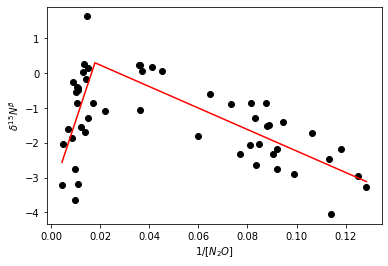

In [66]:
### CALCULATE BREAKPOINT FOR d15Nb ###

x = np.array(data.N2O_inv) # define x
y = np.array(data.d15Nb) # define y

fig, ax = plt.subplots()

ax.scatter( x, y, color = "k" ) # scatter plot of data

initialBreakpoints = [0.02] # initial guess for where the breakpoint will be
# calculate breakpoints & corresponding y-values
(breakpoints, yvals) = SegmentedLinearReg( x, y, initialBreakpoints )
ax.plot(breakpoints, yvals, color = "r") # plot the segmented linear regression

ax.set_xlabel('1/[$N_2O$]')
ax.set_ylabel(r"$\delta^{15}N^{\beta}$")

xsol, ysol = SegmentedLinearReg( x, y, initialBreakpoints )
xsolbeta = xsol[1]
print('d15Nb breakpoint=',xsolbeta)

d15Nb breakpoint= 0.017855175645523653
d15Na breakpoint= 0.0170277593016875
maximum iteration reached
maximum iteration reached
d18O breakpoint= 0.015023050903429813
Mean breakpoint= 0.016635328616880322


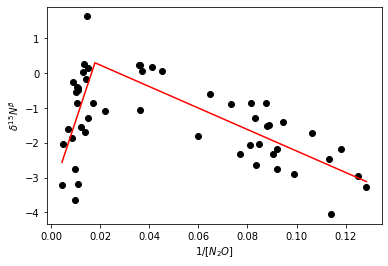

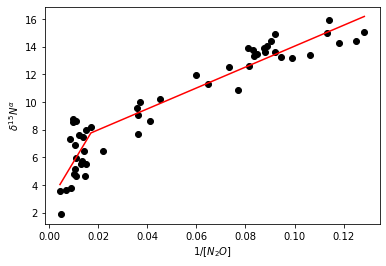

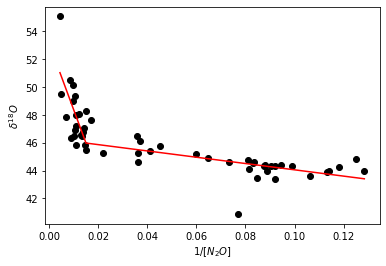

In [67]:
### CALCULATE MEAN BREAKPOINT FOR ALL ISOTOPOMERS ###

x = np.array(data.N2O_inv)
y = np.array(data.d15Nb)

fig, ax = plt.subplots()
ax.plot( x, y, 'ok' ) # this is a shortened version of what we did above
initialBreakpoints = [0.02]
ax.plot( *SegmentedLinearReg( x, y, initialBreakpoints ), '-r' )
ax.set_xlabel('1/[$N_2O$]')
ax.set_ylabel(r"$\delta^{15}N^{\beta}$")

xsol, ysol = SegmentedLinearReg( x, y, initialBreakpoints )
xsolbeta = xsol[1]
print('d15Nb breakpoint=',xsolbeta)

y = np.array(data.d15Na)

fig, ax = plt.subplots()
ax.plot( x, y, 'ok' );

initialBreakpoints = [xsolbeta]
ax.plot( *SegmentedLinearReg( x, y, initialBreakpoints ), '-r' );
ax.set_xlabel('1/[$N_2O$]')
ax.set_ylabel(r"$\delta^{15}N^{\alpha}$")

xsol, ysol = SegmentedLinearReg( x, y, initialBreakpoints )
xsolalpha = xsol[1]
print('d15Na breakpoint=',xsolalpha)

y = np.array(data.d18O)

fig, ax = plt.subplots()
ax.plot( x, y, 'ok' );

initialBreakpoints = [xsolbeta]
ax.plot( *SegmentedLinearReg( x, y, initialBreakpoints ), '-r' );
ax.set_xlabel('1/[$N_2O$]')
ax.set_ylabel(r"$\delta^{18}O$")

xsol, ysol = SegmentedLinearReg( x, y, initialBreakpoints )
xsol18O = xsol[1]
print('d18O breakpoint=',xsol18O)

xcutoff = np.mean([xsolbeta,xsolalpha,xsol18O])
print('Mean breakpoint=',xcutoff)

LinregressResult(slope=244.13902199807302, intercept=-3.7949055120478556, rvalue=0.5651555378561756, pvalue=0.0075923083057358445, stderr=81.75948277477106, intercept_stderr=0.9240571429576833)
LinregressResult(slope=-28.34476425889066, intercept=0.6174536119846197, rvalue=-0.7825964138495946, pvalue=1.975230779401579e-07, stderr=4.186931570376852, intercept_stderr=0.34743677141690005)


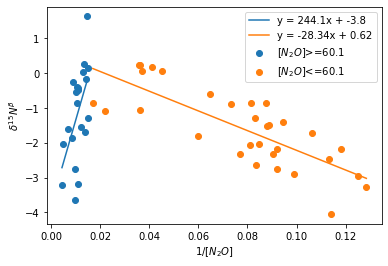

In [68]:
### PLOT SEGMENTED LINEAR REGRESSION ###

breakpoint = 0.016635328616880322 # mean breakpoint from all of the isotopomers

# define the two clusters of data on either side of the breakpoint
cluster1 = data[data.N2O_inv<=breakpoint]
cluster2 = data[data.N2O_inv>=breakpoint]

fig, ax = plt.subplots()
# scatterplot of cluster 1
ax.scatter(cluster1.N2O_inv, cluster1.d15Nb, label = f"[$N_2O$]>={1/breakpoint:3.3}")
# calculate regression stats for the first linear regression
reg1 = stats.linregress(cluster1.N2O_inv, cluster1.d15Nb)
# plot the regression line through cluster 1
ax.plot(cluster1.N2O_inv, cluster1.N2O_inv*reg1.slope+reg1.intercept,
       label=f"y = {reg1.slope:4.4}x + {reg1.intercept:2.2}")

# scatterplot of cluster 2
ax.scatter(cluster2.N2O_inv, cluster2.d15Nb, label = f"[$N_2O$]<={1/breakpoint:3.3}")
# calculate regression stats for the first linear regression
reg2 = stats.linregress(cluster2.N2O_inv, cluster2.d15Nb)
# plot the regression line through cluster 1
ax.plot(cluster2.N2O_inv, cluster2.N2O_inv*reg2.slope+reg2.intercept,
       label=f"y = {reg2.slope:4.4}x + {reg2.intercept:2.2}")

ax.set_xlabel("1/[$N_2O$]")
ax.set_ylabel(r"$\delta^{15}N^{\beta}$")
ax.legend()

print(reg1)
print(reg2)